In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Objective

Develop a model that can predict whether a patient has Parkinsons disease or not.

In [2]:
df = pd.read_csv('/content/parkinsons.csv')
df = df.drop(['name'], axis = 1)

# EDA(Exploratory Data Analysis)

In [3]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


The data will have to be normalised.

In [5]:
df.shape

(195, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

No objects.

In [7]:
df.isnull().sum()

,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0
MDVP:Shimmer(dB),0


No missing values.

<Axes: >

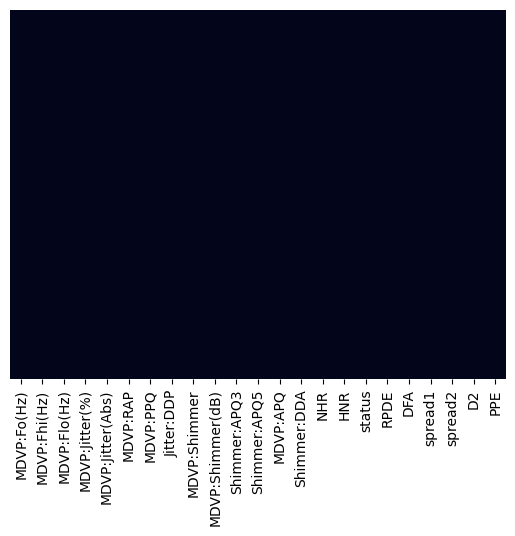

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

No missing values.

# Analyse the target 'Outcome'

In [9]:
df["status"].unique()

array([1, 0])

In [10]:
df['status'].value_counts()

,count
status,
1,147
0,48


# Check correlation of the features with the target 'Outcome'

In [11]:
print(df.corr()["status"].abs().sort_values(ascending=False))

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64


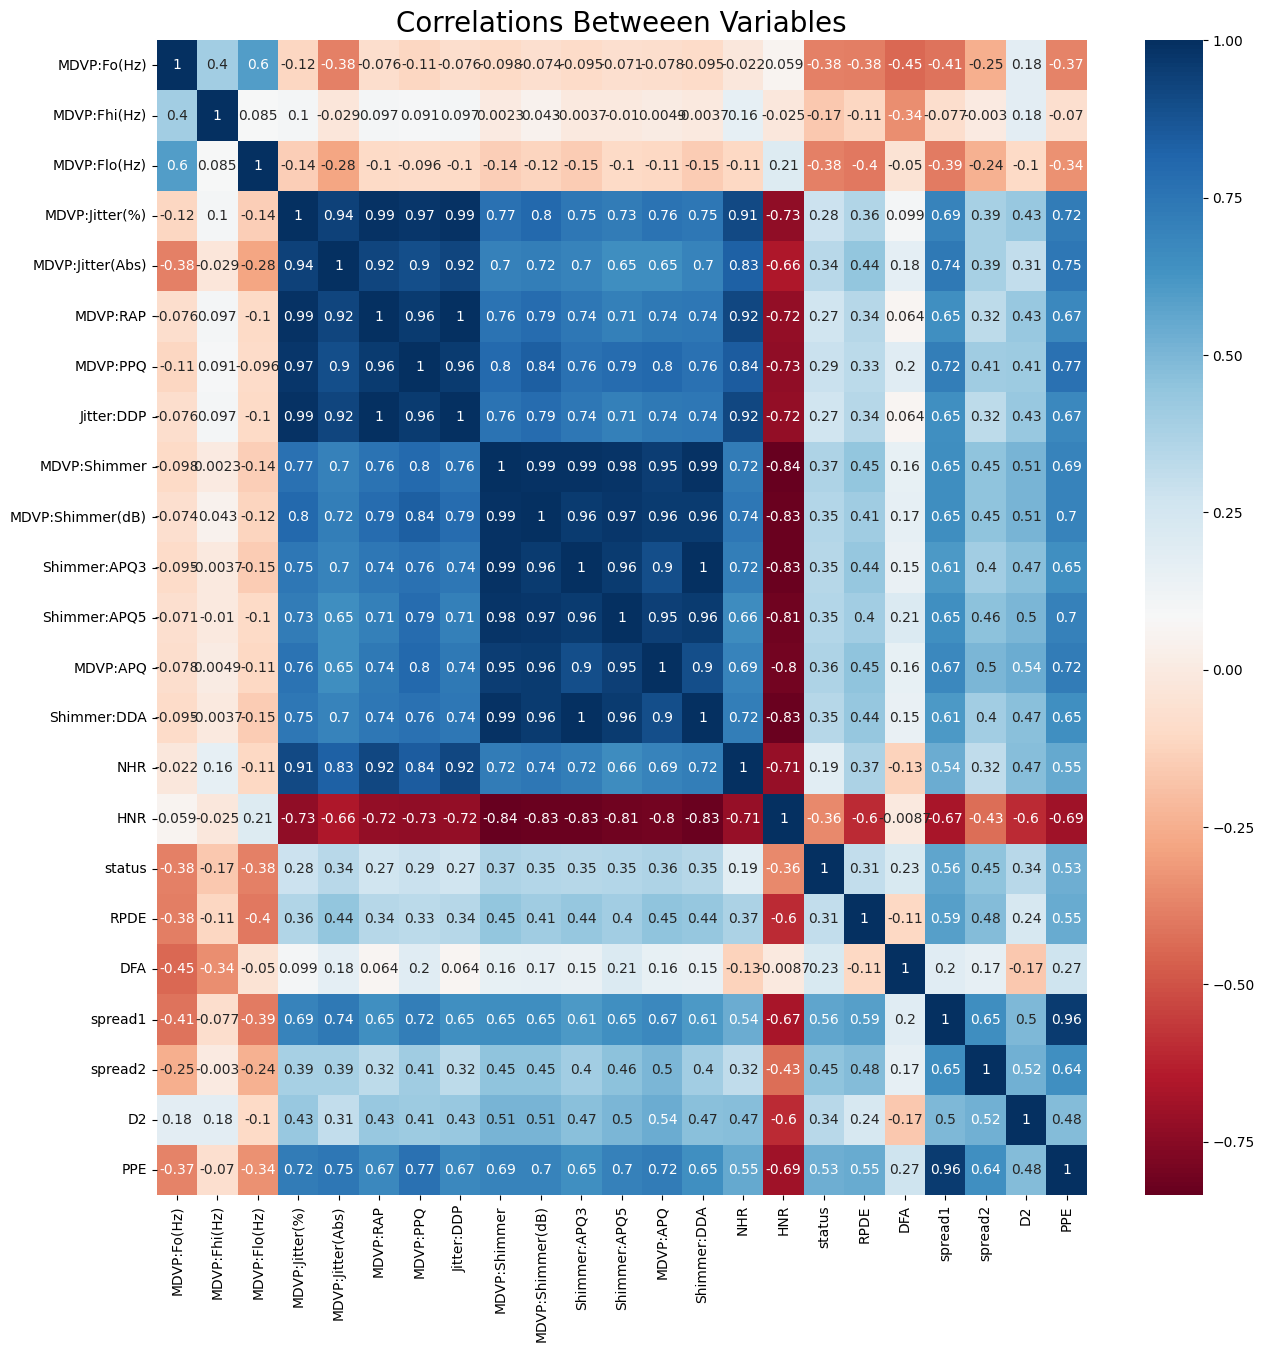

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Betweeen Variables", size=20)
plt.show()

# Set Up Features and Target

In [13]:
x = df.drop(['status'], axis = 1).values
y = df['status'].values

# Data Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)
print(standardized_data)

[[-0.82929965 -0.43616456 -0.95203729 ...  0.48047686 -0.21053082
   0.86888575]
 [-0.77097169 -0.53097409 -0.05772056 ...  1.31118546  0.27507712
   1.80360503]
 [-0.90947638 -0.7231683  -0.10987483 ...  1.01768236 -0.10362861
   1.40266141]
 ...
 [ 0.49557839  0.47010361 -0.96839309 ... -0.81807931  0.78033848
  -0.83241014]
 [ 1.07876114  2.19004398 -0.95417967 ... -0.22906571 -0.63700298
  -0.92610456]
 [ 1.45481664  0.69224632 -0.88348115 ... -0.43085284  0.45480231
  -0.64505466]]


# Split the data into train and test data

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# APPROACH 1 - MODELLING ON IMBALANCED DATA

The data will not be balanced in this approach before doing the modelling. The minority class is not up-sampled.

# 1. A Random Forest Model

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'entropy', max_depth = 20, n_estimators = 10000)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=10000)

In [17]:
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [18]:
from sklearn.metrics import accuracy_score

score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)
print("The accuracy score achieved using the Random Forest model is: "+str(score_rf)+" %")

The accuracy score achieved using the Random Forest model is: 93.22 %


# 2. A Decision Tree Model

In [19]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(x_train,y_train)
    y_pred_dt = dt.predict(x_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=17)

In [20]:
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0])

In [21]:
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)
print("The accuracy score achieved using the Decision Tree model is: "+str(score_dt)+" %")

The accuracy score achieved using the Decision Tree model is: 89.83 %


# 3. A Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_model

LogisticRegression()

In [23]:
y_pred_lr = lr_model.predict(x_test)
y_pred_lr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [24]:
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)
print("The accuracy score achieved using the Logistic Regression model is: "+str(score_lr)+" %")

The accuracy score achieved using the Logistic Regression model is: 83.05 %


# 4. A SVC model

In [25]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

In [26]:
y_pred_svc = svc_model.predict(x_test)
y_pred_svc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
score_svc = round(accuracy_score(y_pred_svc,y_test)*100,2)
print("The accuracy score achieved using the SVC model is: "+str(score_svc)+" %")

The accuracy score achieved using the SVC model is: 81.36 %


# 5. K Nearest Neighbors Model

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [29]:
y_pred_knn=knn.predict(x_test)
y_pred_knn

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [30]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)
print("The accuracy score achieved using the KNN model is: "+str(score_knn)+" %")

The accuracy score achieved using the KNN model is: 83.05 %


# 6. A Naive Bayes Model

In [31]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [32]:
y_pred_nb = nb.predict(x_test)
y_pred_nb

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0])

In [33]:
score_nb = round(accuracy_score(y_pred_nb,y_test)*100,2)
print("The accuracy score achieved using the Naive Bayes model is: "+str(score_nb)+" %")

The accuracy score achieved using the Naive Bayes model is: 74.58 %


# 7. A XGBoost Model

In [34]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [35]:
y_pred_xgb = xgb_model.predict(x_test)
y_pred_xgb

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [36]:
score_xgb = round(accuracy_score(y_pred_xgb,y_test)*100,2)
print("The accuracy score achieved using the XGBoost model is: "+str(score_xgb)+" %")

The accuracy score achieved using the XGBoost model is: 93.22 %


# A Summary of the Scores

In [37]:
scores = [score_lr,score_nb,score_svc,score_knn,score_dt,score_rf,score_xgb] #,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 83.05 %
The accuracy score achieved using Naive Bayes is: 74.58 %
The accuracy score achieved using Support Vector Machine is: 81.36 %
The accuracy score achieved using K-Nearest Neighbors is: 83.05 %
The accuracy score achieved using Decision Tree is: 89.83 %
The accuracy score achieved using Random Forest is: 93.22 %
The accuracy score achieved using XGBoost is: 93.22 %


# A COMPARISON OF THE ACCURACY OF THE SEVEN MODELS

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

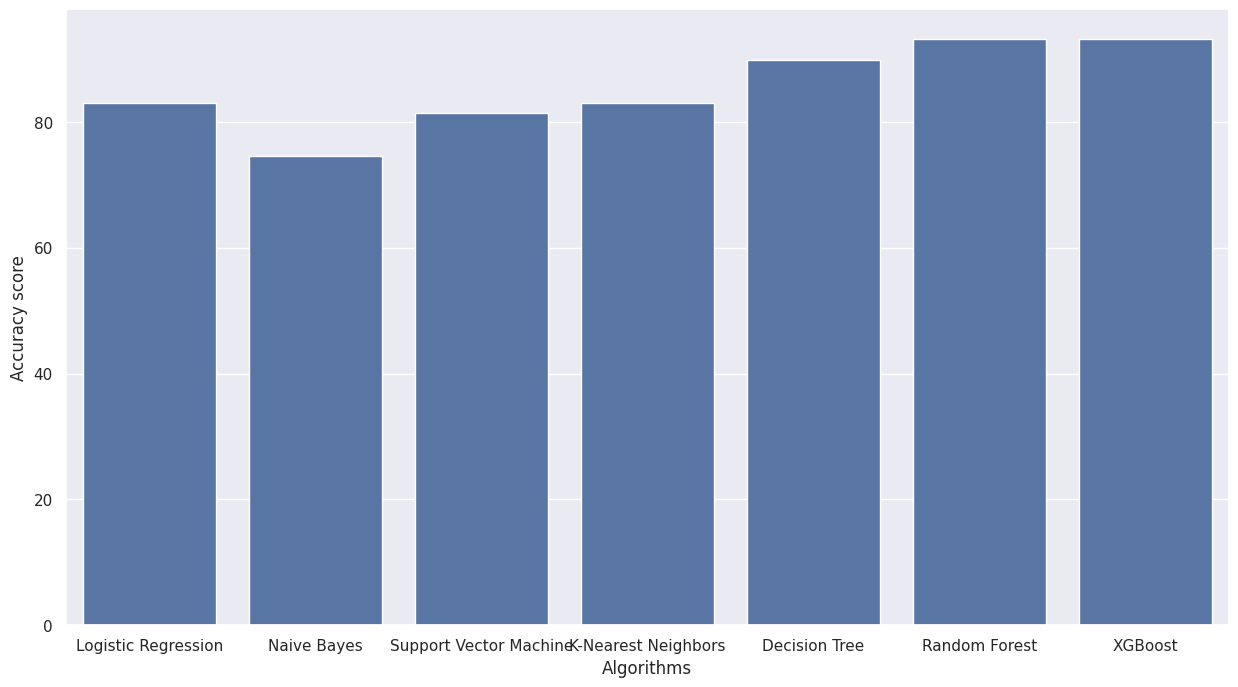

In [38]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms, y=scores)

# Evaluation of the Random Forest Model

# Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

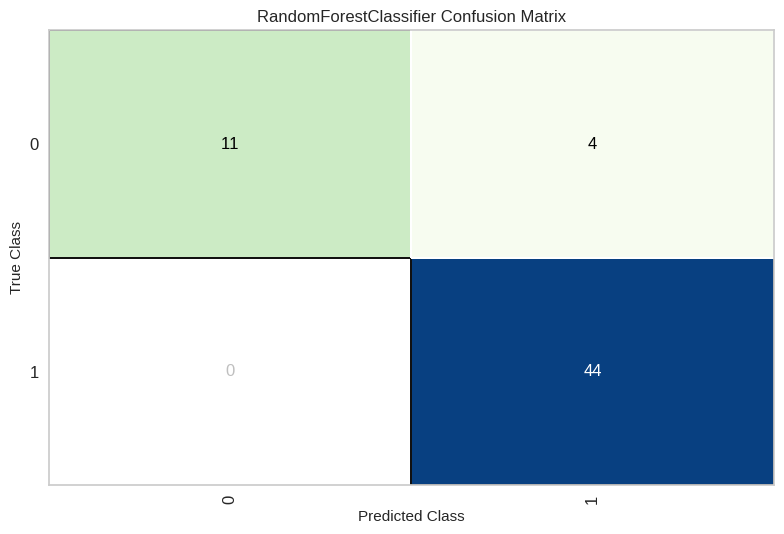

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [40]:
rf_cm = ConfusionMatrix(rf, cmap='GnBu')

rf_cm.fit(x_train, y_train)
rf_cm.score(x_test, y_test)
rf_cm.show()

# Classification Report

In [41]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.92      1.00      0.96        44

    accuracy                           0.93        59
   macro avg       0.96      0.87      0.90        59
weighted avg       0.94      0.93      0.93        59



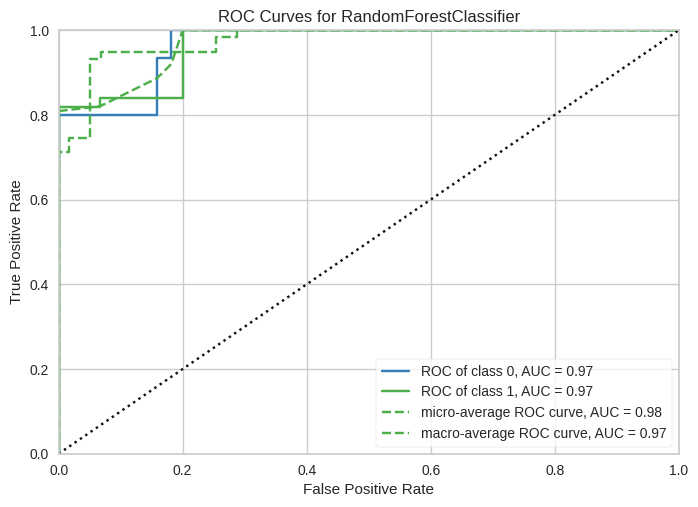

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [42]:
visualizer = ROCAUC(rf)

set_palette('bold')

visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()

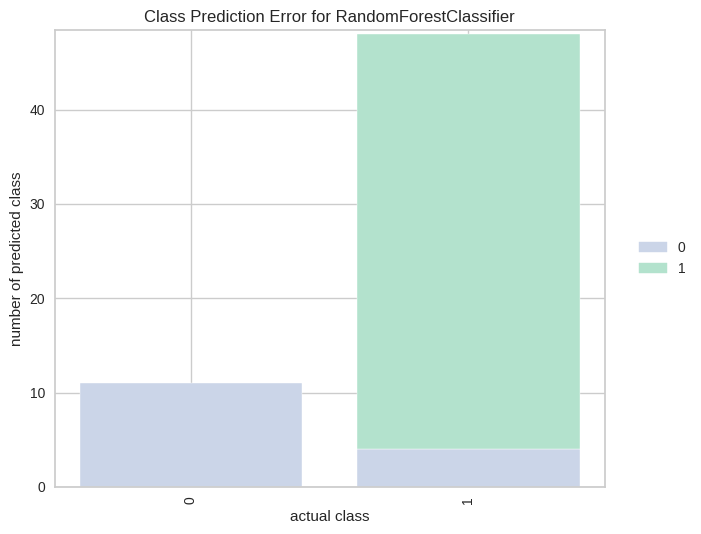

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [43]:
visualizer = ClassPredictionError(rf)

set_palette('pastel')

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

# APPROACH 2 - MODELLING ON BALANCED DATA

In this approach the data will be balanced before modelling. The minority class is up-sampled.

In [44]:
from sklearn.utils import resample

print(df['status'].value_counts())


status
1    147
0     48
Name: count, dtype: int64


In [45]:
#Separate majority and minority classes
df_majority = df[df['status'] == 1]
df_minority = df[df['status'] == 0]

In [46]:
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=500,    # to match average class
                                 random_state=42) # reproducible results

In [47]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
print(df_upsampled['status'].value_counts())

status
0    500
1    147
Name: count, dtype: int64


In [48]:
Y_upsampled = df_upsampled["status"].values
Y_upsampled

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [49]:
# Define the independent variables

X_upsampled = df_upsampled.drop(labels = ["status"], axis=1)
#X_upsampled = normalize(X_upsampled, axis=1)

In [50]:
#Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split
X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled,
                                                                                            Y_upsampled,
                                                                                            test_size=0.2,
                                                                                            random_state=20)

# 1. A Random Forest Model

In [51]:
#Train again with new upsamples data
rf_upsampled = RandomForestClassifier(n_estimators = 56, random_state = 42)

# Train the model on training data
rf_upsampled.fit(X_train_upsampled, y_train_upsampled)


RandomForestClassifier(n_estimators=56, random_state=42)

In [52]:
y_pred_rf_upsampled = rf_upsampled.predict(X_test_upsampled)
y_pred_rf_upsampled

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [53]:
from sklearn.metrics import accuracy_score

score_rf_upsampled = round(accuracy_score(y_pred_rf_upsampled,y_test_upsampled)*100,2)
print("********* METRICS FOR BALANCED DATA USING UPSAMPLING *********")
print("The accuracy score achieved using the Random Forest model is: "+str(score_rf_upsampled)+" %")

********* METRICS FOR BALANCED DATA USING UPSAMPLING *********
The accuracy score achieved using the Random Forest model is: 98.46 %


# Confusion Matrix¶

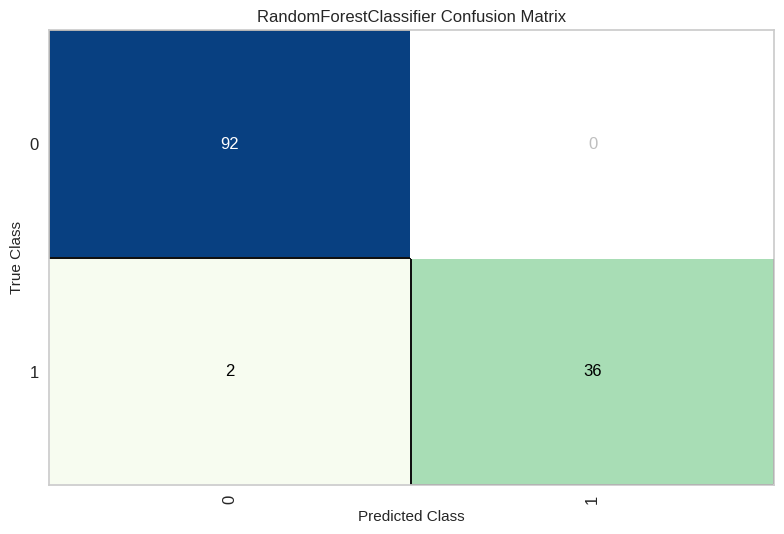

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [54]:
rf_upsampled_cm = ConfusionMatrix(rf_upsampled, cmap='GnBu')

rf_upsampled_cm.fit(X_train_upsampled, y_train_upsampled)
rf_upsampled_cm.score(X_test_upsampled, y_test_upsampled)
rf_upsampled_cm.show()

# Classification Report¶

In [55]:
print(classification_report(y_test_upsampled, y_pred_rf_upsampled))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        92
           1       1.00      0.95      0.97        38

    accuracy                           0.98       130
   macro avg       0.99      0.97      0.98       130
weighted avg       0.98      0.98      0.98       130



In [56]:
cm_upsampled = confusion_matrix(y_test_upsampled, y_pred_rf_upsampled)
print(cm_upsampled)


[[92  0]
 [ 2 36]]


# 2. A Decision Tree Model

In [57]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(500):
    dt_upsampled = DecisionTreeClassifier(random_state=x)
    dt_upsampled.fit(X_train_upsampled,y_train_upsampled)
    y_pred_dt_upsampled = dt_upsampled.predict(X_test_upsampled)
    current_accuracy = round(accuracy_score(y_pred_dt_upsampled,y_test_upsampled)*100)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

In [58]:
dt_upsampled = DecisionTreeClassifier(random_state=best_x)
dt_upsampled.fit(X_train_upsampled,y_train_upsampled)

DecisionTreeClassifier(random_state=4)

In [59]:
y_pred_dt_upsampled = dt_upsampled.predict(X_test_upsampled)
y_pred_dt_upsampled

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [60]:
score_dt_upsampled = round(accuracy_score(y_pred_dt_upsampled,y_test_upsampled)*100,2)
print("********* METRICS FOR BALANCED DATA USING UPSAMPLING *********")
print("The accuracy score achieved using the Decision Tree model is: "+str(score_dt_upsampled)+" %")

********* METRICS FOR BALANCED DATA USING UPSAMPLING *********
The accuracy score achieved using the Decision Tree model is: 99.23 %


# Confusion Matrix

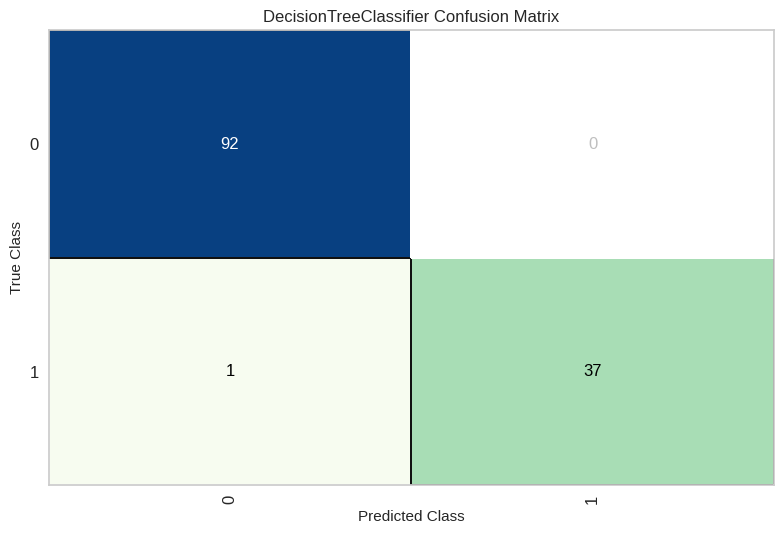

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [61]:
dt_upsampled_cm = ConfusionMatrix(dt_upsampled, cmap='GnBu')

dt_upsampled_cm.fit(X_train_upsampled, y_train_upsampled)
dt_upsampled_cm.score(X_test_upsampled, y_test_upsampled)
dt_upsampled_cm.show()

# Classification Report

In [62]:
print(classification_report(y_test_upsampled, y_pred_dt_upsampled))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        92
           1       1.00      0.97      0.99        38

    accuracy                           0.99       130
   macro avg       0.99      0.99      0.99       130
weighted avg       0.99      0.99      0.99       130



In [63]:
from sklearn.metrics import roc_auc_score, confusion_matrix

cm_upsampled = confusion_matrix(y_test_upsampled, y_pred_dt_upsampled)
print(cm_upsampled)

print("The person does not have Parkinsons disease =  = ", cm_upsampled[0,0] / (cm_upsampled[0,0]+cm_upsampled[1,0])*100)
print("The person has Parkinsons disease = ",  cm_upsampled[1,1] / (cm_upsampled[0,1]+cm_upsampled[1,1])*100)


print("ROC_AUC score for balanced data using upsampling is:")
print(roc_auc_score(y_test_upsampled, y_pred_dt_upsampled)*100)

[[92  0]
 [ 1 37]]
The person does not have Parkinsons disease =  =  98.9247311827957
The person has Parkinsons disease =  100.0
ROC_AUC score for balanced data using upsampling is:
98.6842105263158


# 3. A Logistic Regression Model

In [64]:
from sklearn.linear_model import LogisticRegression

lr_model_upsampled = LogisticRegression(random_state=42, max_iter = 1000).fit(X_train_upsampled,y_train_upsampled)
lr_model_upsampled

LogisticRegression(max_iter=1000, random_state=42)

In [65]:
y_pred_lr_upsampled = lr_model_upsampled.predict(X_test_upsampled)
y_pred_lr_upsampled

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [66]:
score_lr_upsampled = round(accuracy_score(y_pred_lr_upsampled,y_test_upsampled)*100,2)
print("********* METRICS FOR BALANCED DATA USING UPSAMPLING *********")
print("The accuracy score achieved using the LogisticRegression model is: "+str(score_lr_upsampled)+" %")

********* METRICS FOR BALANCED DATA USING UPSAMPLING *********
The accuracy score achieved using the LogisticRegression model is: 83.85 %


# 4. A SVM model

In [67]:
from sklearn.svm import SVC

svc_upsampled = SVC()
svc_upsampled.fit(X_train_upsampled,y_train_upsampled)

SVC()

In [68]:
y_pred_svc_upsampled = svc_upsampled.predict(X_test_upsampled)
y_pred_svc_upsampled

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [69]:
score_svc_upsampled = round(accuracy_score(y_pred_svc_upsampled,y_test_upsampled)*100,2)
print("********* METRICS FOR BALANCED DATA USING UPSAMPLING *********")
print("The accuracy score achieved using the svm model is: "+str(score_svc_upsampled)+" %")

********* METRICS FOR BALANCED DATA USING UPSAMPLING *********
The accuracy score achieved using the svm model is: 70.77 %


# 5. A XGBoost Model

In [70]:
import xgboost as xgb

xgb_upsampled = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_upsampled.fit(X_train_upsampled, y_train_upsampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [71]:
y_pred_xgb_upsampled = xgb_upsampled.predict(X_test_upsampled)
y_pred_xgb_upsampled

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [72]:
score_xgb_upsampled = round(accuracy_score(y_pred_xgb_upsampled,y_test_upsampled)*100,2)
print("********* METRICS FOR BALANCED DATA USING UPSAMPLING *********")
print("The accuracy score achieved using the XGB model is: "+str(score_xgb_upsampled)+" %")

********* METRICS FOR BALANCED DATA USING UPSAMPLING *********
The accuracy score achieved using the XGB model is: 99.23 %


# 6. A K Nearest Neighbors Model

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_upsampled,y_train_upsampled)

KNeighborsClassifier(n_neighbors=7)

In [74]:
y_pred_knn_upsampled = knn.predict(X_test_upsampled)
y_pred_knn_upsampled

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [75]:
score_knn_upsampled = round(accuracy_score(y_pred_knn_upsampled,y_test_upsampled)*100,2)
print("The accuracy score achieved using the KNN model is: "+str(score_knn_upsampled)+" %")

The accuracy score achieved using the KNN model is: 90.0 %


#  7. A Naive Bayes Model

In [76]:
from sklearn.naive_bayes import GaussianNB

nb_upsampled = GaussianNB()
nb_upsampled.fit(X_train_upsampled,y_train_upsampled)

GaussianNB()

In [77]:
y_pred_nb_upsampled = nb_upsampled.predict(X_test_upsampled)
y_pred_nb_upsampled

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [78]:
score_nb_upsampled = round(accuracy_score(y_pred_nb_upsampled,y_test_upsampled)*100,2)
print("The accuracy score achieved using the Naive Bayes model is: "+str(score_nb_upsampled)+" %")

The accuracy score achieved using the Naive Bayes model is: 83.85 %


# A Summary of the Scores

In [79]:
scores = [score_lr_upsampled,score_svc_upsampled,score_dt_upsampled,score_rf_upsampled, score_xgb_upsampled,score_knn_upsampled, score_nb_upsampled]
algorithms = ["Logistic Regression","Support Vector Machine","Decision Tree","Random Forest", "K-Nearest Neighbors", "Naive Bayes","XGBoost"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 83.85 %
The accuracy score achieved using Support Vector Machine is: 70.77 %
The accuracy score achieved using Decision Tree is: 99.23 %
The accuracy score achieved using Random Forest is: 98.46 %
The accuracy score achieved using K-Nearest Neighbors is: 99.23 %
The accuracy score achieved using Naive Bayes is: 90.0 %
The accuracy score achieved using XGBoost is: 83.85 %


# A COMPARISON OF THE ACCURACY OF THE SEVEN MODELS

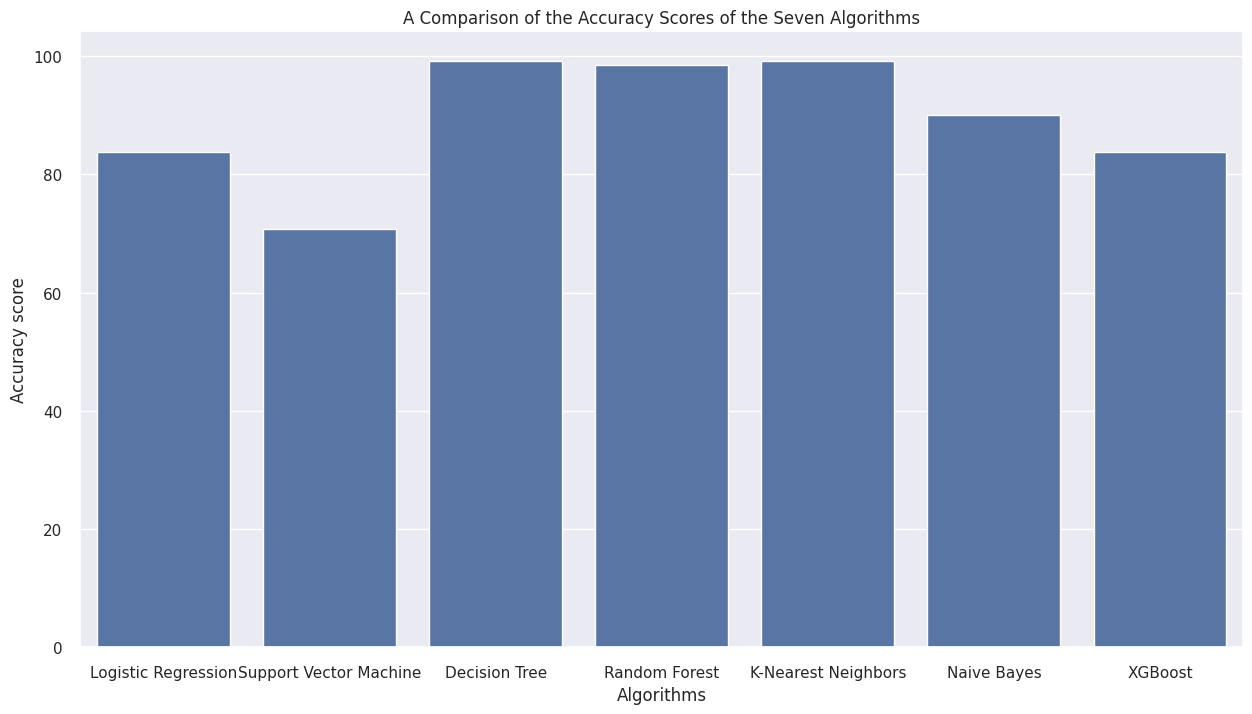

In [80]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x=algorithms,y=scores)
plt.title("A Comparison of the Accuracy Scores of the Seven Algorithms")
plt.show()

# Making a predictive system

In [81]:
input_data = (119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = knn.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person does not have parkinsons disease')
else:
  print('The person has parkinsons disease')

[1]
The person has parkinsons disease


# Saving the trained model

In [82]:
import pickle

In [83]:
filename = 'Parkinsons_model.sav'
pickle.dump(knn, open(filename, 'wb'))

In [84]:
#loading the saved model
loaded_model = pickle.load(open('Parkinsons_model.sav','rb'))

In [85]:
input_data = (119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = knn.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person does not have parkinsons disease')
else:
  print('The person has parkinsons disease')

[1]
The person has parkinsons disease
